In [2]:
import numpy as np
import matplotlib.pyplot as plt
from poke.writing import read_serial_to_rayfront
from poke.poke_core import Rayfront
import poke.plotting as plot

In [3]:
rf = read_serial_to_rayfront('sample_rayfront.msgpack')

<ipython-input-7-b1ca02b7f1bf>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


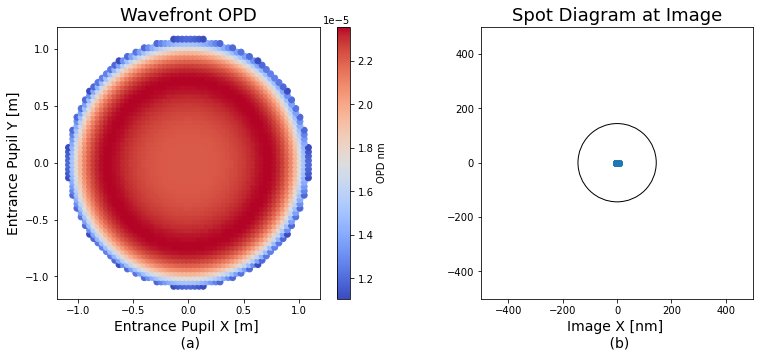

In [7]:
rayset = 0
surf = -1
size = 1e-10
r = rf.xData[rayset,0]**2 + rf.yData[rayset,0]**2 
mask = r < np.max(rf.xData[rayset,0])
fig = plt.figure(figsize=[13,5])
plt.title('Fooprint Diagram')
plt.subplot(121)
plt.title('Wavefront OPD')
plt.scatter(rf.xData[rayset,0][mask],rf.yData[rayset,0][mask],c=1e6*(rf.opd[rayset,surf]-np.mean(rf.opd[rayset,surf]))[mask],cmap='coolwarm')
plt.colorbar(label='OPD nm')
plt.ylabel('Entrance Pupil Y [m]',fontsize=14)
plt.xlabel('Entrance Pupil X [m] \n (a)',fontsize=14)
ax = plt.subplot(122)
plt.title('Spot Diagram at Image')
offset = -0.4061995389968682
plt.scatter((rf.xData[rayset,surf][mask])/size,(rf.yData[rayset,surf][mask]-offset)/size)
plt.xlabel('Image X [nm] \n (b)',fontsize=14)
circ = plt.Circle((0, 0), 144,fill=0,edgecolor='black')
ax.add_patch(circ)
ax.set_aspect('equal')
plt.xlim([-500,500])
plt.ylim([-500,500])
plt.show()

In [ ]:
surfaces = rf.surfaces
print(surfaces)
rf.surfaces = surfaces[:-1]
rf.compute_jones_pupil(aloc=np.array([0.,1.,0.]))

[{'surf': 2, 'coating': (1.0194+6.6388j), 'mode': 'reflect'}, {'surf': 4, 'coating': (1.0194+6.6388j), 'mode': 'reflect'}, {'surf': 8, 'coating': (1.0194+6.6388j), 'mode': 'reflect'}, {'surf': 11, 'coating': 1, 'mode': 'reflect'}]


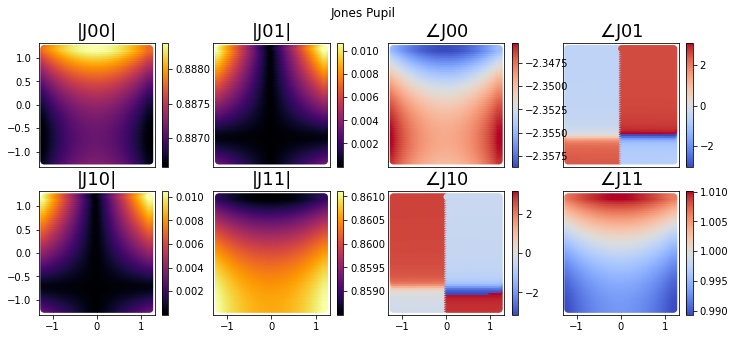

In [ ]:
import poke.plotting as plot
plot.jones_pupil(rf)

In [ ]:
from hcipy import *
from poke.interfaces import rayfront_to_hcipy_wavefront

# define HCIPy parameters
npix = 256
pupil_grid = make_pupil_grid(npix)
focal_grid = make_focal_grid(8,12)
prop = FraunhoferPropagator(pupil_grid,focal_grid)
telescope_aperture = make_magellan_aperture(True)(pupil_grid)

# convert the Rayfront's jones pupil to an HCIPy wavefront
wavefront = rayfront_to_hcipy_wavefront(rf,npix,pupil_grid)

# apply aperture and propagate
wavefront.electric_field *= telescope_aperture
focused_wavefront = prop(wavefront)


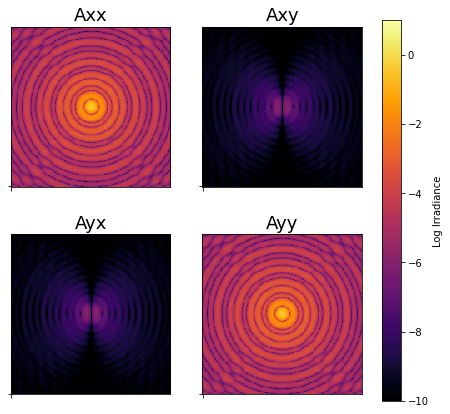

In [ ]:
fig,ax = plt.subplots(ncols=2,nrows=2,figsize=[7,7])
title = ['Axx','Axy','Ayx','Ayy']
k = 0
for i in range(2):
    for j in range(2):
        toplot = np.abs(arm[i,j])**2
        im = ax[i,j].imshow(np.log10(toplot),cmap='inferno',vmin=-10,vmax=1)
        ax[i,j].set_xticks([0])
        ax[i,j].set_xticklabels([''])
        ax[i,j].set_yticks([0])
        ax[i,j].set_yticklabels([''])
        ax[i,j].set_title(title[k])
        k += 1
fig.colorbar(im,ax=ax,fraction=0.05,label='Log Irradiance')
plt.show()

In [ ]:
arm.electric_field.shaped.shape

(2, 2, 192, 192)